## Analyse the Resource Behaviour

In [3]:
from pm4py.algo.organizational_mining.resource_profiles.algorithm import activity_completions, activity_frequency
import pm4py

In [4]:
file_path = '../data/BPI_Challenge_2019-3-w-after.xes'
log = pm4py.read_xes(file_path=file_path)
event_log = pm4py.convert_to_event_log(log)
event_log_df = pm4py.convert_to_dataframe(event_log)

/Users/I568756/Documents/Uni-Mannheim/is515-case-group1/.venv/lib/python3.12/site-packages/pm4py/utils.py:986: UserWarning: In the current version, the import/export operation uses `rustxes` by default for importing/exporting files faster. Please uninstall `rustxes` to revert the behavior.
  warnings.warn("In the current version, the import/export operation uses `rustxes` by default for importing/exporting files faster. Please uninstall `rustxes` to revert the behavior.")


In [5]:
event_log_df["Cumulative net worth (EUR)"]

0          557.0
1          557.0
2          557.0
3          557.0
4          557.0
           ...  
319228      47.0
319229      47.0
319230      47.0
319231    2577.0
319232    2052.0
Name: Cumulative net worth (EUR), Length: 319233, dtype: float64

In [6]:
len(event_log_df["org:resource"].unique())

262

In [7]:
count_batch = 0
count_user = 0
for resource in event_log_df["org:resource"].unique():
    if "batch" in resource:
        count_batch += 1
    else:
        count_user += 1
print("Count batch", count_batch)
print("Count user", count_user)


Count batch 14
Count user 248


In [8]:
from pm4py.algo.organizational_mining.sna.variants.log import handover

handover_matrix = handover.apply(event_log)
handover_probabilities = handover_matrix.connections
handover_probabilities

{('batch_00', 'batch_00'): 0.012346612903756278,
 ('batch_00', 'user_000'): 0.002604826164031692,
 ('batch_00', 'user_002'): 0.0009735208895876021,
 ('batch_00', 'NONE'): 0.0006676511506293352,
 ('batch_00', 'user_010'): 1.9733531545694635e-05,
 ('batch_00', 'user_019'): 6.577843848564879e-06,
 ('batch_00', 'user_001'): 4.275598501567171e-05,
 ('batch_00', 'user_011'): 1.3155687697129759e-05,
 ('batch_00', 'user_013'): 2.6311375394259517e-05,
 ('batch_00', 'user_020'): 2.3022453469977078e-05,
 ('batch_00', 'user_015'): 7.56452042584961e-05,
 ('batch_00', 'user_012'): 2.6311375394259517e-05,
 ('batch_00', 'user_005'): 0.0002335134566240532,
 ('batch_00', 'user_025'): 9.866765772847318e-06,
 ('batch_00', 'user_026'): 3.2889219242824396e-06,
 ('batch_00', 'user_014'): 2.9600297318541956e-05,
 ('batch_00', 'user_016'): 3.2889219242824396e-06,
 ('batch_00', 'user_028'): 9.866765772847318e-06,
 ('batch_00', 'batch_06'): 2.9600297318541956e-05,
 ('batch_00', 'user_110'): 1.3155687697129759e-0

In [9]:
import pandas as pd

df = pd.DataFrame(
    [(src, tgt, prob) for (src, tgt), prob in handover_probabilities.items()],
    columns=["Source", "Target", "Probability"]
)


pivot = df.pivot(index="Source", columns="Target", values="Probability").fillna(0)

users = ["user_451", "user_118"]

valid_users = [u for u in users if u in pivot.index and u in pivot.columns]

df.to_csv("all_resources", index=False)


In [10]:
if "user_118" in pivot.columns.tolist():
    print(True)
    print(pivot.columns.tolist())

True
['NONE', 'batch_00', 'batch_01', 'batch_02', 'batch_06', 'batch_07', 'batch_10', 'batch_11', 'batch_12', 'batch_13', 'batch_18', 'user_000', 'user_001', 'user_002', 'user_003', 'user_004', 'user_005', 'user_006', 'user_007', 'user_008', 'user_009', 'user_010', 'user_011', 'user_012', 'user_013', 'user_014', 'user_015', 'user_016', 'user_017', 'user_018', 'user_019', 'user_020', 'user_021', 'user_022', 'user_023', 'user_024', 'user_025', 'user_026', 'user_027', 'user_028', 'user_029', 'user_031', 'user_032', 'user_033', 'user_034', 'user_035', 'user_036', 'user_037', 'user_038', 'user_039', 'user_040', 'user_042', 'user_043', 'user_044', 'user_045', 'user_046', 'user_047', 'user_048', 'user_049', 'user_050', 'user_054', 'user_057', 'user_058', 'user_059', 'user_060', 'user_061', 'user_063', 'user_064', 'user_066', 'user_068', 'user_070', 'user_071', 'user_072', 'user_073', 'user_077', 'user_079', 'user_080', 'user_081', 'user_082', 'user_083', 'user_084', 'user_085', 'user_086', 'u

In [11]:
if "user_118" in pivot.index.tolist():
    print(True)
    print(pivot.index.tolist())

True
['NONE', 'batch_00', 'batch_01', 'batch_02', 'batch_06', 'batch_07', 'batch_08', 'batch_10', 'batch_11', 'batch_12', 'batch_13', 'batch_15', 'batch_16', 'batch_17', 'batch_18', 'user_000', 'user_001', 'user_002', 'user_003', 'user_004', 'user_005', 'user_006', 'user_007', 'user_008', 'user_009', 'user_010', 'user_011', 'user_012', 'user_013', 'user_014', 'user_015', 'user_016', 'user_017', 'user_018', 'user_019', 'user_020', 'user_021', 'user_022', 'user_023', 'user_024', 'user_025', 'user_026', 'user_027', 'user_028', 'user_029', 'user_031', 'user_032', 'user_033', 'user_034', 'user_035', 'user_036', 'user_037', 'user_038', 'user_039', 'user_040', 'user_042', 'user_043', 'user_044', 'user_045', 'user_046', 'user_047', 'user_048', 'user_049', 'user_050', 'user_054', 'user_057', 'user_058', 'user_059', 'user_060', 'user_061', 'user_063', 'user_064', 'user_066', 'user_068', 'user_070', 'user_071', 'user_072', 'user_073', 'user_075', 'user_077', 'user_078', 'user_079', 'user_080', 'u

In [12]:
def get_resource_per_activity(event_log_df, activity_column_name="concept:name", resource_column_name="org:resource"):

    activity_resource_mapping = {}

    column_activity = event_log_df[activity_column_name]
    column_resource = event_log_df[resource_column_name]

    for index, activity in enumerate(column_activity):

        resource = column_resource[index]
        
        if activity not in activity_resource_mapping:
            activity_resource_mapping[activity] = {resource: 1}
        elif resource not in activity_resource_mapping[activity]:
            activity_resource_mapping[activity][resource] = 1
        else:
            activity_resource_mapping[activity][resource] += 1
    
    return activity_resource_mapping


activity_resource_mapping = get_resource_per_activity(event_log_df=event_log_df)
print(activity_resource_mapping)

{'SRM: Created': {'batch_00': 610, 'user_009': 27, 'user_010': 37, 'user_014': 40, 'user_016': 22, 'user_017': 2, 'user_021': 8, 'user_022': 16, 'user_026': 3, 'user_444': 1, 'batch_18': 1}, 'SRM: Complete': {'batch_00': 605, 'user_009': 28, 'user_010': 38, 'user_014': 40, 'user_016': 22, 'user_017': 2, 'user_021': 8, 'user_022': 16, 'user_026': 3, 'user_028': 3, 'user_444': 1, 'batch_18': 1}, 'SRM: Awaiting Approval': {'batch_00': 605, 'user_009': 28, 'user_010': 38, 'user_014': 40, 'user_016': 22, 'user_017': 2, 'user_021': 8, 'user_022': 16, 'user_026': 3, 'user_028': 3, 'user_444': 1, 'batch_18': 1}, 'SRM: Document Completed': {'batch_00': 605, 'user_009': 28, 'user_010': 38, 'user_014': 40, 'user_016': 22, 'user_017': 2, 'user_021': 8, 'user_022': 16, 'user_026': 3, 'user_028': 3, 'user_444': 1, 'batch_18': 1}, 'SRM: Ordered': {'batch_00': 767}, 'SRM: In Transfer to Execution Syst.': {'batch_00': 771, 'user_003': 71, 'user_025': 36, 'user_026': 1, 'user_340': 1, 'user_016': 1, 'us

In [13]:
def get_most_frequent_resource_per_activity(activity_resource_mapping):
    max_resource_activity = {}
    for activity, resources in activity_resource_mapping.items():
        max_resource_activity[activity] = max(resources, key=resources.get)
    return max_resource_activity
        
max_resource_activity = get_most_frequent_resource_per_activity(activity_resource_mapping=activity_resource_mapping)
print(max_resource_activity)

{'SRM: Created': 'batch_00', 'SRM: Complete': 'batch_00', 'SRM: Awaiting Approval': 'batch_00', 'SRM: Document Completed': 'batch_00', 'SRM: Ordered': 'batch_00', 'SRM: In Transfer to Execution Syst.': 'batch_00', 'SRM: Change was Transmitted': 'batch_00', 'Create Purchase Order Item': 'user_147', 'Vendor creates invoice': 'NONE', 'Record Goods Receipt': 'batch_06', 'Record Service Entry Sheet': 'NONE', 'Record Invoice Receipt': 'user_001', 'Clear Invoice': 'user_002', 'SRM: Transfer Failed (E.Sys.)': 'user_003', 'Cancel Goods Receipt': 'user_200', 'Change Delivery Indicator': 'user_147', 'SRM: Deleted': 'batch_00', 'Change Price': 'user_038', 'Vendor creates debit memo': 'NONE', 'Cancel Invoice Receipt': 'user_015', 'Remove Payment Block': 'user_015', 'Delete Purchase Order Item': 'user_286', 'SRM: Transaction Completed': 'user_009', 'Change Final Invoice Indicator': 'user_000', 'SRM: Incomplete': 'batch_00', 'SRM: Held': 'batch_00', 'Change Quantity': 'user_147', 'Change Approval for

In [14]:
def get_percantage_resource_activity(activity_resource_mapping):
    percantage_resource_activity = {}
    most_frequent_resource_per_activity = get_most_frequent_resource_per_activity(activity_resource_mapping)
    for activity, resources in activity_resource_mapping.items():
        total_frequency = sum(resources.values())
        resource = most_frequent_resource_per_activity.get(activity)
        freq_resource = activity_resource_mapping[activity][resource]
        percantage_resource_activity[activity] = {resource : freq_resource/total_frequency}
    return percantage_resource_activity

print(get_percantage_resource_activity(activity_resource_mapping))

{'SRM: Created': {'batch_00': 0.7953063885267275}, 'SRM: Complete': {'batch_00': 0.788787483702738}, 'SRM: Awaiting Approval': {'batch_00': 0.788787483702738}, 'SRM: Document Completed': {'batch_00': 0.788787483702738}, 'SRM: Ordered': {'batch_00': 1.0}, 'SRM: In Transfer to Execution Syst.': {'batch_00': 0.8692220969560316}, 'SRM: Change was Transmitted': {'batch_00': 1.0}, 'Create Purchase Order Item': {'user_147': 0.12613621393755764}, 'Vendor creates invoice': {'NONE': 1.0}, 'Record Goods Receipt': {'batch_06': 0.41054018445322793}, 'Record Service Entry Sheet': {'NONE': 1.0}, 'Record Invoice Receipt': {'user_001': 0.244547710830649}, 'Clear Invoice': {'user_002': 0.8484118291347207}, 'SRM: Transfer Failed (E.Sys.)': {'user_003': 1.0}, 'Cancel Goods Receipt': {'user_200': 0.2939936775553214}, 'Change Delivery Indicator': {'user_147': 0.34146341463414637}, 'SRM: Deleted': {'batch_00': 1.0}, 'Change Price': {'user_038': 0.31194151096669376}, 'Vendor creates debit memo': {'NONE': 1.0}

In [15]:
def get_percentage_all_resources(activity_resource_mapping):
    percentage_all_resources = {}
    for activity, resources in activity_resource_mapping.items():
        total_freq = sum(resources.values())
        percentage_all_resources[activity] = {}
        for resource, freq in resources.items():
            percentage_all_resources[activity][resource] = freq/total_freq
    return percentage_all_resources

In [16]:
import pandas as pd
df_filtered = pd.read_csv("../process-discovery/filtered_event_log.csv")
activity_resource_mapping_filtered = get_resource_per_activity(df_filtered)
print("Mapping: ", activity_resource_mapping)
max_resource_activity_filtered = get_most_frequent_resource_per_activity(activity_resource_mapping_filtered)
print("Max", max_resource_activity_filtered)
percentage_resource_activity = get_percantage_resource_activity(activity_resource_mapping_filtered)
print("Percentage", percentage_resource_activity)
all_percentages = get_percentage_all_resources(activity_resource_mapping_filtered)
print("All percentages", all_percentages)

Mapping:  {'SRM: Created': {'batch_00': 610, 'user_009': 27, 'user_010': 37, 'user_014': 40, 'user_016': 22, 'user_017': 2, 'user_021': 8, 'user_022': 16, 'user_026': 3, 'user_444': 1, 'batch_18': 1}, 'SRM: Complete': {'batch_00': 605, 'user_009': 28, 'user_010': 38, 'user_014': 40, 'user_016': 22, 'user_017': 2, 'user_021': 8, 'user_022': 16, 'user_026': 3, 'user_028': 3, 'user_444': 1, 'batch_18': 1}, 'SRM: Awaiting Approval': {'batch_00': 605, 'user_009': 28, 'user_010': 38, 'user_014': 40, 'user_016': 22, 'user_017': 2, 'user_021': 8, 'user_022': 16, 'user_026': 3, 'user_028': 3, 'user_444': 1, 'batch_18': 1}, 'SRM: Document Completed': {'batch_00': 605, 'user_009': 28, 'user_010': 38, 'user_014': 40, 'user_016': 22, 'user_017': 2, 'user_021': 8, 'user_022': 16, 'user_026': 3, 'user_028': 3, 'user_444': 1, 'batch_18': 1}, 'SRM: Ordered': {'batch_00': 767}, 'SRM: In Transfer to Execution Syst.': {'batch_00': 771, 'user_003': 71, 'user_025': 36, 'user_026': 1, 'user_340': 1, 'user_01

In [17]:
print(all_percentages["Create Purchase Order Item"])
print(all_percentages["Record Invoice Receipt"])
print(all_percentages["Create Purchase Requisition Item"])

{'user_000': 0.04017915953102358, 'user_033': 0.006586747464102227, 'user_036': 0.0042155183770254245, 'user_042': 0.01719141088130681, 'user_045': 0.004874193123435648, 'user_072': 0.013305229877486497, 'user_038': 0.06942431827163746, 'user_079': 0.03754446054538269, 'user_091': 0.01798182057699908, 'user_092': 0.002502964036358846, 'user_116': 0.002502964036358846, 'user_060': 0.0026346989856408905, 'batch_06': 0.07001712554340667, 'batch_02': 0.07199314978263734, 'user_131': 0.0005269397971281781, 'user_138': 0.033526544592280334, 'user_141': 0.00698195231194836, 'user_043': 0.01719141088130681, 'batch_10': 0.05993940192333026, 'user_160': 0.0021736266631537347, 'user_140': 6.586747464102226e-05, 'user_161': 6.586747464102226e-05, 'user_172': 0.03464629166117771, 'user_142': 0.0565142932419971, 'user_100': 0.00013173494928204451, 'user_191': 0.0034251086813331575, 'batch_07': 0.04340666578843367, 'user_147': 0.12613621393755764, 'user_200': 0.035502568831511, 'user_201': 0.00072454

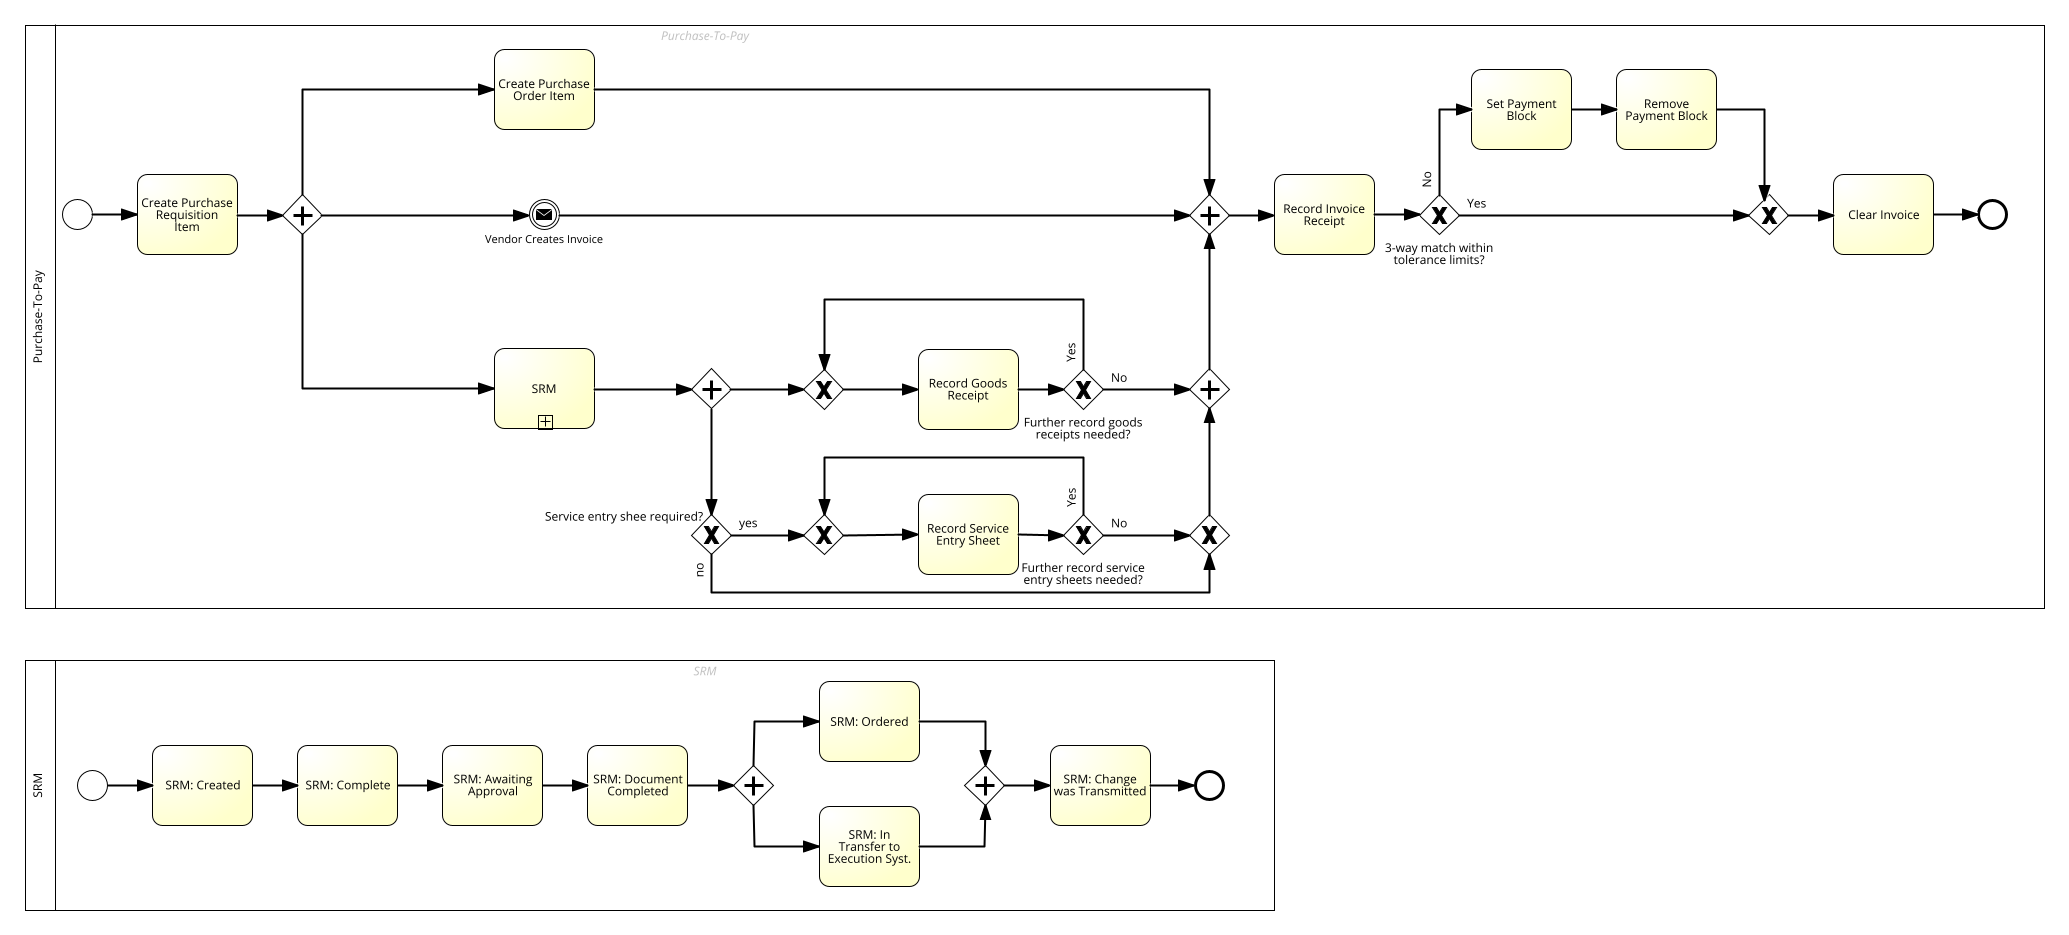

In [18]:
from IPython.display import display,HTML
from PIL import Image

path = "../process-discovery/bpnm/Purchase-2-Pay-CaseStudy-tobe-3.png"
with Image.open(path) as i:
	display(i)

If we look at the most frequent resource than we can see that the SRM process is mostly executed by batch_00 which means that it is done automatically.

### Handover Matrix only for Resources that are most frequent in the process

In [19]:
selected_resources = max_resource_activity_filtered.values()
print(selected_resources)

filtered_matrix = {
    (r1, r2): weight
    for (r1, r2), weight in handover_probabilities.items()
    if r1 in selected_resources and r2 in selected_resources
}
filtered_matrix

dict_values(['batch_00', 'batch_00', 'batch_00', 'batch_00', 'batch_00', 'batch_00', 'batch_00', 'user_147', 'NONE', 'batch_06', 'NONE', 'user_001', 'user_002', 'user_003', 'batch_00', 'user_015', 'user_451'])


{('batch_00', 'batch_00'): 0.012346612903756278,
 ('batch_00', 'user_002'): 0.0009735208895876021,
 ('batch_00', 'NONE'): 0.0006676511506293352,
 ('batch_00', 'user_001'): 4.275598501567171e-05,
 ('batch_00', 'user_015'): 7.56452042584961e-05,
 ('batch_00', 'batch_06'): 2.9600297318541956e-05,
 ('batch_00', 'user_147'): 3.2889219242824396e-06,
 ('NONE', 'NONE'): 0.47407836185376795,
 ('NONE', 'batch_00'): 0.001032721484224686,
 ('NONE', 'user_003'): 2.3022453469977078e-05,
 ('NONE', 'user_001'): 0.007133671653768612,
 ('NONE', 'user_002'): 0.0032823440804338744,
 ('NONE', 'user_015'): 0.0008024969495249153,
 ('NONE', 'batch_06'): 0.015694735422675802,
 ('NONE', 'user_147'): 0.0001743128619869693,
 ('user_003', 'user_003'): 0.00014800148659270976,
 ('user_003', 'NONE'): 3.2889219242824396e-06,
 ('user_002', 'user_003'): 0.00018417962775981662,
 ('user_002', 'NONE'): 0.0036572811798020726,
 ('user_002', 'user_015'): 0.00031573650473111416,
 ('user_002', 'user_002'): 0.0016970837129297387

In [20]:
df = pd.DataFrame(
    [(src, tgt, prob) for (src, tgt), prob in filtered_matrix.items()],
    columns=["Source", "Target", "Probability"]
)

pivot = df.pivot(index="Source", columns="Target", values="Probability").fillna(0)
pivot

Target,NONE,batch_00,batch_06,user_001,user_002,user_003,user_015,user_147
Source,,,,,,,,
NONE,0.474078,0.001033,0.015695,0.007134,0.003282,0.000023,0.000802,0.000174
batch_00,0.000668,0.012347,0.000030,0.000043,0.000974,0.000000,0.000076,0.000003
batch_06,0.019092,0.000066,0.081006,0.000832,0.000099,0.000000,0.000095,0.000066
user_001,0.001128,0.000079,0.000030,0.002236,0.007249,0.000000,0.001122,0.000007
user_002,0.003657,0.000030,0.000046,0.000826,0.001697,0.000184,0.000316,0.000003
user_003,0.000003,0.000000,0.000000,0.000000,0.000000,0.000148,0.000000,0.000000
user_015,0.000391,0.000003,0.000003,0.000145,0.003055,0.000000,0.001049,0.000000
user_147,0.003144,0.000007,0.002388,0.000033,0.000039,0.000000,0.000003,0.000753


In [21]:
df.to_csv("output.csv", index=False)

In [22]:
def get_most_frequent_handover(handover_dict):
    result = {}
    
    for (src, tgt), prob in handover_dict.items():
        if src not in result:
            result[src] = (tgt, prob)
        else:
            if prob > result[src][1]:
                result[src] = (tgt, prob)

    return result


most_frequent = get_most_frequent_handover(handover_probabilities)

df_most_freq = pd.DataFrame(
    [(src, tgt_prob[0], tgt_prob[1]) for src, tgt_prob in most_frequent.items()],
    columns=["Source", "Target", "Probability"]
)

pivot = df_most_freq.pivot(index="Source", columns="Target", values="Probability").fillna(0)
pivot


Target,NONE,batch_00,batch_01,batch_02,batch_06,batch_07,batch_13,batch_18,user_000,user_001,...,user_353,user_358,user_365,user_424,user_444,user_500,user_524,user_538,user_549,user_601
Source,,,,,,,,,,,,,,,,,,,,,
NONE,0.474078,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000
batch_00,0.000000,0.012347,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000
batch_01,0.000000,0.000000,0.000046,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000
batch_02,0.000000,0.000000,0.000000,0.015093,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000
batch_06,0.000000,0.000000,0.000000,0.000000,0.081006,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_538,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00001,0.00000,0.000000
user_549,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00001,0.000000
user_556,0.000000,0.000000,0.000000,0.000003,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000


In [23]:
event_log_filtered = pm4py.format_dataframe(
    df_filtered,
    case_id="case:concept:name",    
    activity_key="concept:name",    
    timestamp_key="time:timestamp"  
)

event_log_filtered = pm4py.convert_to_event_log(event_log_filtered)

In [24]:
handover_matrix_filtered = handover.apply(event_log_filtered)
handover_probabilities_filtered = handover_matrix_filtered.connections

most_frequent_fil = get_most_frequent_handover(handover_probabilities)

df_most_freq_fil = pd.DataFrame(
    [(src, tgt_prob[0], tgt_prob[1]) for src, tgt_prob in most_frequent_fil.items()],
    columns=["Source", "Target", "Probability"]
)
pivot_fil = df_most_freq_fil.pivot(index="Source", columns="Target", values="Probability").fillna(0)
pivot_fil

Target,NONE,batch_00,batch_01,batch_02,batch_06,batch_07,batch_13,batch_18,user_000,user_001,...,user_353,user_358,user_365,user_424,user_444,user_500,user_524,user_538,user_549,user_601
Source,,,,,,,,,,,,,,,,,,,,,
NONE,0.474078,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000
batch_00,0.000000,0.012347,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000
batch_01,0.000000,0.000000,0.000046,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000
batch_02,0.000000,0.000000,0.000000,0.015093,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000
batch_06,0.000000,0.000000,0.000000,0.000000,0.081006,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_538,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00001,0.00000,0.000000
user_549,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00001,0.000000
user_556,0.000000,0.000000,0.000000,0.000003,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000


### Which activity takes how long to complete on average (take timestamp before and after)

In [25]:
import pandas as pd
from statistics import mean

def average_activity_sojourn_time(log, activity_key="concept:name"):
    durations = {}

    for trace in log:
        events = list(trace)  

        for i in range(len(events) - 1):
            current = events[i]
            next_event = events[i + 1]

            activity = current[activity_key]
            start_time = current["time:timestamp"]
            end_time = next_event["time:timestamp"]

            duration = (end_time - start_time).total_seconds()

            if duration >= 0: 
                durations.setdefault(activity, []).append(duration)

    avg = {act: mean(times) for act, times in durations.items()}
    return avg 

print(average_activity_sojourn_time(event_log))

{'SRM: Created': 5509.908735332464, 'SRM: Complete': 0.0, 'SRM: Awaiting Approval': 0.0, 'SRM: Document Completed': 24888.265971316818, 'SRM: Ordered': 145.42372881355934, 'SRM: In Transfer to Execution Syst.': 23256.72473867596, 'SRM: Change was Transmitted': 591122.6178010472, 'Create Purchase Order Item': 736684.7520384975, 'Vendor creates invoice': 1378108.4845809422, 'Record Goods Receipt': 252934.4811840013, 'Record Service Entry Sheet': 27709.503821912298, 'Record Invoice Receipt': 1500106.6382688703, 'Clear Invoice': 1615184.8681541581, 'Cancel Goods Receipt': 400944.89116517286, 'SRM: Deleted': 108369.38775510204, 'Change Price': 573295.07346586, 'Vendor creates debit memo': 3294588.0706921946, 'Cancel Invoice Receipt': 140230.2834008097, 'Remove Payment Block': 1648168.9395973154, 'Delete Purchase Order Item': 277872.85714285716, 'SRM: Transaction Completed': 6734160.0, 'SRM: Transfer Failed (E.Sys.)': 8938740.0, 'Change Delivery Indicator': 1500236.1627906978, 'SRM: Incomple

### Which area spended the most money?

In [26]:
df_filtered.columns

Index(['time:timestamp', 'User', 'Cumulative net worth (EUR)', 'org:resource',
       'lifecycle:transition', 'concept:name',
       'case:(case) GR-Based Inv. Verif.', 'case:(case) Vendor',
       'case:(case) Purchasing Document', 'case:variant-index',
       'case:(case) Spend area text', 'case:(case) Item Category',
       'case:(case) Name', 'case:creator', 'case:(case) Company',
       'case:(case) Item', 'case:concept:name', 'case:(case) Source',
       'case:(case) Sub spend area text',
       'case:(case) Purch. Doc. Category name', 'case:(case) Item Type',
       'case:(case) Goods Receipt', 'case:(case) Spend classification text',
       'case:variant', 'case:(case) Document Type'],
      dtype='object')

In [29]:
def calculate_spend_per_area(df: pd.DataFrame) -> pd.DataFrame:
    df_unique = df.drop_duplicates(subset=['case:(case) Spend area text', 'case:variant-index'])
    spend_per_area = df_unique.groupby('case:(case) Spend area text')['Cumulative net worth (EUR)'].sum().reset_index()
    
    spend_per_area = spend_per_area.rename(columns={'Cumulative net worth (EUR)': 'Total Spend'})
    
    return spend_per_area

spend_per_area = calculate_spend_per_area(df_filtered)
spend_per_area.sort_values(by="Total Spend", ascending=False)

,case:(case) Spend area text,Total Spend
5,Logistics,83505191.0
6,Marketing,28251887.0
17,Workforce Services,8211166.0
7,Others,4857994.0
4,Latex & Monomers,3176618.0
3,Enterprise Services,2404432.0
1,CAPEX & SOCS,2307835.0
8,Packaging,1665318.0
11,Sales,1151365.0
16,Trading & End Products,1081189.0


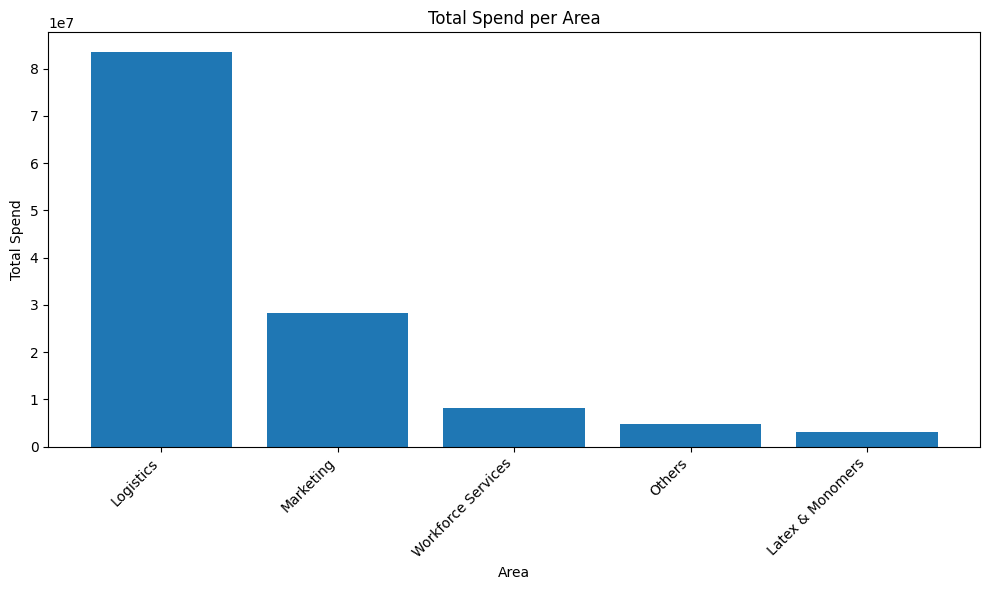

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming spend_per_area has columns: 'Area' and 'Total Spend'
spend_per_area_sorted = spend_per_area.sort_values(by="Total Spend", ascending=False).head(5)

# Plot with Matplotlib
plt.figure(figsize=(10,6))
plt.bar(spend_per_area_sorted["case:(case) Spend area text"], spend_per_area_sorted['Total Spend'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Area')
plt.ylabel('Total Spend')
plt.title('Total Spend per Area')
plt.tight_layout()
plt.show()




### On which item did they spend their money?

In [32]:
def items_per_department(df: pd.DataFrame) -> pd.DataFrame:
    df_unique = df.drop_duplicates(subset=['case:variant-index', 'case:(case) Item', 'case:(case) Sub spend area text'])
    item_counts = df_unique.groupby(["case:(case) Spend area text", 'case:(case) Item']).size().reset_index(name='Count')
    
    item_counts = (
        df_unique.groupby(["case:(case) Spend area text", 'case:(case) Item'])
        .size()
        .reset_index(name='Count')
        .sort_values(["case:(case) Spend area text", 'Count'], ascending=[True, False])
    )
    
    return item_counts

department_items = items_per_department(df_filtered)
department_items

,case:(case) Spend area text,case:(case) Item,Count
0,Additives,10,98
1,Additives,20,31
2,Additives,30,19
3,Additives,40,11
4,Additives,50,1
...,...,...,...
379,Workforce Services,10,3
378,Workforce Services,2,2
380,Workforce Services,20,1
381,Workforce Services,30,1


In [35]:
def most_frequent_item_per_department(df: pd.DataFrame) -> pd.DataFrame:
    df_unique = df.drop_duplicates(subset=['case:variant-index', 'case:(case) Item', "case:(case) Spend area text"])
    
    item_counts = df_unique.groupby(["case:(case) Spend area text", 'case:(case) Item']).size().reset_index(name='Count')
    
    most_frequent = item_counts.loc[item_counts.groupby("case:(case) Spend area text")['Count'].idxmax()].reset_index(drop=True)
    
    return most_frequent

most_frequent_items = most_frequent_item_per_department(df_filtered)
most_frequent_items

,case:(case) Spend area text,case:(case) Item,Count
0,Additives,10,56
1,CAPEX & SOCS,1,45
2,Commodity Resins,10,11
3,Enterprise Services,1,47
4,Latex & Monomers,10,82
5,Logistics,1,2804
6,Marketing,1,136
7,Others,10,69
8,Packaging,10,133
9,Pigments & Colorants,10,34
